# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [47]:
import os
import pandas as pd
import numpy as np

cd = os.getcwd()
Jobs = pd.read_csv(cd[0:-6]+'DataScientist.csv')

In [48]:
Jobs.head(2)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1


In [90]:
Jobs.shape

(3909, 17)

The Kaggle data set 'Data Scientist Jobs" shows 3909 data scientist positions that were scraped from glassdoor in August 2020. Information such as the job title, job description, company rating, company name, etc... is provided for each position. 

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [150]:
values = []

for col in Jobs:
    num = len(Jobs[col].unique())
    values.append([col,num])

values_df = pd.DataFrame(values[2:],columns=['categories','values']) #exclude first 2 columns (irrelevant info)
values_df = values_df.sort_values(by='values',ascending=False)

In [151]:
values_df.head()

,categories,values
2,Job Description,3685
0,Job Title,2079
4,Company Name,2075
6,Headquarters,543
13,Competitors,422


The most diverse column is job description which is expected because every job description should be different since companies don't usually post the same position at the same time. Interestingly, out of 3909 positions, there are are 2079 different job titles.  

In [145]:
counts = Jobs['Job Title'].value_counts(ascending=False)

In [126]:
counts[counts>=10].head(15)

Data Scientist                   274
Data Engineer                    260
Data Analyst                     246
Senior Data Scientist             91
Machine Learning Engineer         47
Senior Data Analyst               47
Big Data Engineer                 41
Business Intelligence Analyst     39
Senior Data Engineer              37
Lead Data Scientist               23
Sr. Data Scientist                23
Research Scientist                22
Data Modeler                      17
Principal Data Scientist          15
Junior Data Analyst               15
Name: Job Title, dtype: int64

In [127]:
counts[counts<10]

Microsoft Dynamics CRM Data Analyst                                     9
Sr Data Scientist                                                       9
Microsoft Analytics Consultant                                          9
Principal Data Scientist- Public Sector                                 9
Quantitative Analyst                                                    8
                                                                       ..
Workforce & Data Analytics Manager (Call Center Experience Required)    1
ANALYST - SCIENTIST - KINETICS                                          1
Urgent Need - Data Analyst                                              1
Data Analyst - Contractor                                               1
Senior Scientist, Assay Operations                                      1
Name: Job Title, Length: 2053, dtype: int64

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [169]:
unique = Jobs.nunique().reset_index()
unique[unique[0] == 1]

,index,0


There are no columns that have the same value for every row across any of the columns. 


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd0c81c978>]],
      dtype=object)

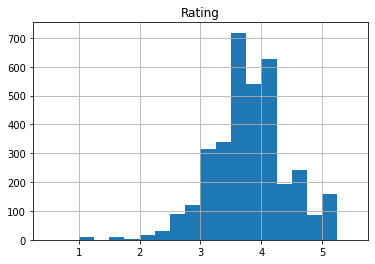

In [217]:
Jobs[['Rating']].hist(bins=20, range=[0.5,5.5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd0c42fa58>]],
      dtype=object)

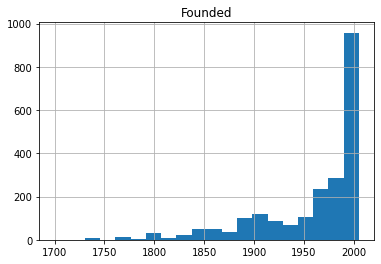

In [218]:
Jobs[['Founded']].hist(bins=20, range=[1700,2005])

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [198]:
best_companies=Jobs[Jobs['Rating']==5]

In [199]:
best_companies['Job Title'].value_counts(ascending=False)

Data Analyst                                      20
Data Engineer                                     16
Data Scientist                                    14
Junior Data Analyst                                9
Senior Data Scientist                              7
                                                  ..
Data Scientist (DoD Secret Security Clearance)     1
Software Engineer/Data Analyst                     1
Senior Machine Learning Engineer                   1
Big Data Engineer with Cloudera                    1
AI Insights Data Analyst                           1
Name: Job Title, Length: 87, dtype: int64

In [205]:
best_companies['Company Name'].value_counts()

Staffigo Technical Services, LLC\n5.0            28
Georgia IT Inc.\n5.0                              7
Nucleusteq\n5.0                                   5
Pro Lancer\n5.0                                   4
WB Technology\n5.0                                3
                                                 ..
McCall and Lee\n5.0                               1
American Recruiting and Consulting Group\n5.0     1
EDO, Inc.\n5.0                                    1
Hungryroot\n5.0                                   1
Connect International\n5.0                        1
Name: Company Name, Length: 96, dtype: int64

In [206]:
Jobs['Industry'].value_counts()

-1                                  546
IT Services                         472
Staffing & Outsourcing              313
Biotech & Pharmaceuticals           293
Computer Hardware & Software        264
                                   ... 
Sporting Goods Stores                 1
Health Fundraising Organizations      1
Metals Brokers                        1
Auto Repair & Maintenance             1
Religious Organizations               1
Name: Industry, Length: 96, dtype: int64

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

---

In [ ]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push


---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.